<b><font size=20, color='#A020F0'>GeoPandas

Emily Mather and Karissa Shannon<br>
12/2/22<br>

#### <span style="color:green">Learning Goals</span>
By the end of this notebook you will
1. Become familiar with basic functions in GeoPandas
2. Understand how GeoPandas can be used as a tool for AOS applications

#### Resources
[GeoPandas Documentation](https://geopandas.org/en/stable/docs.html)<br>
[GeoPandas API](https://geopandas.org/en/stable/docs/reference.html)

# A little about GeoPandas

Geopandas is a package designed to work with GIS data, such as shape files, and convert them into Pandas dataframes, which make it easy to work with in python. If you have ever used ArcMAP or ArcGIS, Geopandas can do many functions similar to these programs. 

Let's begin by importing GeoPandas and a few other packages we'll need for today:

In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

---

# 1. Reading in Data

Geopandas can be used to read in shapefiles, a file type commonly used in GIS. Shape files can contain points, lines, and polygons that represent geographic features. On your computer, a shapefile will actually contain multiple files with different file extentions. You can read more about the different file extentions and what they mean [here](https://gisgeography.com/arcgis-shapefile-files-types-extensions/). GeoPandas needs at least the .shp, .shx, and .dbf to read in the data. The files must be in the same location with the same name. Take a look at the folder named shape_states to see the data we will first look at with the correct format.

In [2]:
#readin data using GeoDataFrame.from_file
gdf = gpd.GeoDataFrame.from_file('shape_states/cb_2018_us_state_5m.shp')
#set the index to be the state or territory name
gdf = gdf.set_index("NAME")
gdf.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/aos573tutorials/share/proj failed


STATEFP   STATENS     AFFGEOID GEOID STUSPS LSAD         ALAND  \
NAME                                                                          
Nebraska          31  01779792  0400000US31    31     NE   00  198956658395   
Washington        53  01779804  0400000US53    53     WA   00  172112588220   
New Mexico        35  00897535  0400000US35    35     NM   00  314196306401   
South Dakota      46  01785534  0400000US46    46     SD   00  196346981786   
Texas             48  01779801  0400000US48    48     TX   00  676653171537   

                   AWATER                                           geometry  
NAME                                                                          
Nebraska       1371829134  POLYGON ((-104.05351 41.15726, -104.05267 41.2...  
Washington    12559278850  MULTIPOLYGON (((-122.32834 48.02134, -122.3217...  
New Mexico      728776523  POLYGON ((-109.05017 31.48000, -109.04984 31.4...  
South Dakota   3382720225  POLYGON ((-104.05770 44.99743, -104.05021 44.9...  
Texas         19006305260  POLYGON ((-106.64548 31.89867, -106.64084 31.9...

The data looks a lot like a Pandas DataFrame! This datatype is called a GeoDataFrame and will behave in similar ways to a DataFrame. The variable geometries will be in every GeoDataFrame, this variabe tells us the geospaial information given in the file. In this case we have polygons that outline the shape of each state.

## 2. Exploring the Data

Let's take a look at one state, Arizona

In [3]:
az = gdf[gdf.index == 'Arizona']
az

STATEFP   STATENS     AFFGEOID GEOID STUSPS LSAD         ALAND  \
NAME                                                                     
Arizona      04  01779777  0400000US04    04     AZ   00  294198551143   

             AWATER                                           geometry  
NAME                                                                    
Arizona  1027337603  POLYGON ((-114.79968 32.59362, -114.80939 32.6...

Like many packages, GeoPandas has a build-in plotting function. Let's test it out on California.

<AxesSubplot: >

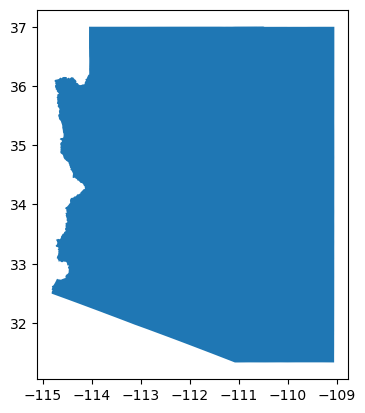

In [4]:
az.plot()

GeoPandas has a really cool feature called explore. This allows you to overlay your data on a world map and use your curser to zoom and drag over the areas you want. You can also get information conatined in the shape by hovering over the area.

In [5]:
gdf.explore()

Crs will tell you the projection your data is in and the information about that projection. There are 2 types of projections, projected CRS (in meters, feet, or other distance measurement) and geographic CRS (in degrees). Our data is currently in a geographic CRS because we can see the axis info is in Lat/Lon. 

In [6]:
gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

Some functions in GeoPandas require using a projected CRS in order to get a more accurate calculation, such as area and distance. The to_crs fuction can easily convert datadets into different projections. Let's convert our dataset to EPSG 3310 in order to calculate area.

In [7]:
gdf_3310 = gdf.to_crs("EPSG:3310")

In [8]:
gdf_3310.crs

<Derived Projected CRS: EPSG:3310>
Name: NAD83 / California Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California.
- bounds: (-124.45, 32.53, -114.12, 42.01)
Coordinate Operation:
- name: California Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Now our dataset is in California Albers and our x and y coordinates are in meters and we can calculate the area!

In [9]:
gdf_3310['area'] = gdf_3310.area
#calculate area and add it to the dataset

Lets plot again to see what changed.

<AxesSubplot: >

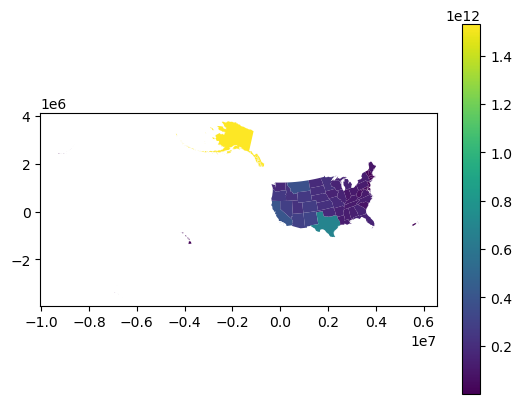

In [10]:
gdf_3310.plot('area', legend = True)

## 3. Filtering Data

Now that we have some of the basics down, let's see what we can do with a new dataset. We're going to read in a wildfire dataset from MODIS. This is just a text file, so we can use regular Pandas to read it in.

In [11]:
MODIS = pd.read_csv('MODIS_C6_1_USA_contiguous_and_Hawaii_MCD14DL_NRT_2022165.txt',sep=',')

In [12]:
MODIS

latitude  longitude  brightness  scan  track    acq_date acq_time  \
0    18.92761  -70.35136      302.20  1.82   1.32  2022-06-14    02:26   
1    17.89924  -92.49486      300.11  1.27   1.12  2022-06-14    04:04   
2    17.88928  -92.49307      300.09  1.27   1.12  2022-06-14    04:04   
3    32.19355 -102.01650      310.07  2.86   1.61  2022-06-14    04:08   
4    32.18162 -102.01776      306.09  2.86   1.61  2022-06-14    04:08   
..        ...        ...         ...   ...    ...         ...      ...   
520  35.91956 -105.58009      486.31  4.38   1.93  2022-06-14    21:06   
521  35.92135 -105.53653      498.19  4.41   1.93  2022-06-14    21:06   
522  19.40393 -155.30200      339.36  1.77   1.30  2022-06-14    21:12   
523  19.40100 -155.28529      395.67  1.77   1.30  2022-06-14    21:12   
524  19.41254 -155.28307      342.68  1.77   1.30  2022-06-14    21:12   

    satellite  confidence version  bright_t31       frp daynight  
0           T          46  6.1NRT      289.82     10.88        N  
1           T           6  6.1NRT      284.40      4.57        N  
2           T           5  6.1NRT      284.71      4.07        N  
3           T          74  6.1NRT      295.88     36.40        N  
4           T          56  6.1NRT      295.75     23.79        N  
..        ...         ...     ...         ...       ...      ...  
520         A         100  6.1NRT      318.13  10949.26        D  
521         A         100  6.1NRT      310.54  13250.58        D  
522         T          89  6.1NRT      310.98     69.74        D  
523         T         100  6.1NRT      316.49    502.63        D  
524         T          88  6.1NRT      314.13     91.27        D  

[525 rows x 13 columns]

Let's say we want to extract only fires from Arizona. How would we do so? That's where our previous shapefile comes in.

In [13]:
# first, combine the lon and lat to make a single variable 'coords'
MODIS['coords'] = list(zip(MODIS['longitude'],MODIS['latitude'])) 
# then, turn the coords into a 'Point' 
# GeoPandas only understands points, lines, and polygons
MODIS['coords'] = MODIS['coords'].apply(Point) 
#turn modis into a geodataframe, make sure to specify the crs from the shape file!
MODIS_geo = gpd.GeoDataFrame(MODIS, geometry='coords', crs=gdf.crs)    
#join the 2 geodataframes together    
pointInPolys = gpd.tools.sjoin(MODIS_geo, gdf, predicate="within", how='left')
    
Arizonafirepoints = pointInPolys[pointInPolys.index_right=='Arizona']
Arizonafirepoints

latitude  longitude  brightness  scan  track    acq_date acq_time  \
40   31.87365 -111.59316      320.13  1.70   1.28  2022-06-14    05:46   
41   31.86221 -111.59128      311.19  1.70   1.28  2022-06-14    05:46   
42   31.86400 -111.57243      306.24  1.71   1.28  2022-06-14    05:46   
43   31.85235 -111.57258      307.24  1.71   1.28  2022-06-14    05:46   
44   31.83206 -111.56326      331.91  1.71   1.28  2022-06-14    05:46   
..        ...        ...         ...   ...    ...         ...      ...   
501  35.36532 -111.41614      354.60  1.79   1.31  2022-06-14    21:04   
502  35.36160 -111.45656      354.18  1.78   1.31  2022-06-14    21:04   
503  35.37003 -111.61808      340.77  1.74   1.29  2022-06-14    21:04   
512  33.61528 -109.38515      345.23  2.31   1.47  2022-06-14    21:04   
513  33.61316 -109.40993      346.02  2.30   1.47  2022-06-14    21:04   

    satellite  confidence version  ...                       coords  \
40          T         100  6.1NRT  ...  POINT (-111.59316 31.87365)   
41          T          78  6.1NRT  ...  POINT (-111.59128 31.86221)   
42          T          15  6.1NRT  ...  POINT (-111.57243 31.86400)   
43          T          12  6.1NRT  ...  POINT (-111.57258 31.85235)   
44          T         100  6.1NRT  ...  POINT (-111.56326 31.83206)   
..        ...         ...     ...  ...                          ...   
501         A          96  6.1NRT  ...  POINT (-111.41614 35.36532)   
502         A          95  6.1NRT  ...  POINT (-111.45656 35.36160)   
503         A          63  6.1NRT  ...  POINT (-111.61808 35.37003)   
512         A          88  6.1NRT  ...  POINT (-109.38515 33.61528)   
513         A          89  6.1NRT  ...  POINT (-109.40993 33.61316)   

     index_right STATEFP   STATENS     AFFGEOID GEOID STUSPS LSAD  \
40       Arizona      04  01779777  0400000US04    04     AZ   00   
41       Arizona      04  01779777  0400000US04    04     AZ   00   
42       Arizona      04  01779777  0400000US04    04     AZ   00   
43       Arizona      04  01779777  0400000US04    04     AZ   00   
44       Arizona      04  01779777  0400000US04    04     AZ   00   
..           ...     ...       ...          ...   ...    ...  ...   
501      Arizona      04  01779777  0400000US04    04     AZ   00   
502      Arizona      04  01779777  0400000US04    04     AZ   00   
503      Arizona      04  01779777  0400000US04    04     AZ   00   
512      Arizona      04  01779777  0400000US04    04     AZ   00   
513      Arizona      04  01779777  0400000US04    04     AZ   00   

            ALAND        AWATER  
40   2.941986e+11  1.027338e+09  
41   2.941986e+11  1.027338e+09  
42   2.941986e+11  1.027338e+09  
43   2.941986e+11  1.027338e+09  
44   2.941986e+11  1.027338e+09  
..            ...           ...  
501  2.941986e+11  1.027338e+09  
502  2.941986e+11  1.027338e+09  
503  2.941986e+11  1.027338e+09  
512  2.941986e+11  1.027338e+09  
513  2.941986e+11  1.027338e+09  

[109 rows x 23 columns]

## 4. Grouping Data

Now we have a subset of our original dataset which just consists of the fires identified in Arizona. Let's take a look at that.

In [14]:
Arizonafirepoints.explore()

We have a bunch of datapoints that represent fires detected by MODIS but if you look closer, some of those points are clustered together, indicating a single large fire picked up by multiple pixles. What if we want to group those individual data points together so we can analyze each fire as a unit?

We need to connect the data points with others in their vecinity. We can use buffer to create a new GeoDataFrame that consists of polygons centered around. The default shape is (approximately) a circle with a radius equal to the distance argument. Currently our dataset is in a geographic CRS which means the radius is measured in degrees lat and lon. You'll notice we get a warning saying our results are likely incorrect. That's because 0.02 degree latitude is not the same distance as 0.02 degrees longitude so the buffers are actually closer to elipses. For our puposes, this is fine since we are just using the buffer to group datapoints together. If you were using it in an application where the exact distance mattered, you would need to re-porject your data to a projected CRS first. 

You can also use buffer around lines and polygons and can change the shape of the buffer with the argument cap_style.

In [15]:
AZbuffers = gpd.GeoDataFrame(Arizonafirepoints.buffer(.02), geometry = Arizonafirepoints.buffer(.02))

#Create square around points instead
#AZbuffers = gpd.GeoDataFrame(Arizonafirepoints.buffer(.02), geometry = Arizonafirepoints.buffer(.02, cap_style = 3))

/tmp/ipykernel_120812/4186308058.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  AZbuffers = gpd.GeoDataFrame(Arizonafirepoints.buffer(.02), geometry = Arizonafirepoints.buffer(.02))
/tmp/ipykernel_120812/4186308058.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  AZbuffers = gpd.GeoDataFrame(Arizonafirepoints.buffer(.02), geometry = Arizonafirepoints.buffer(.02))


In [16]:
AZbuffers.explore()

Now we want to take all of the overlapping shapes and combine them into one. To do this we will use explode.

In [17]:
AZmultipoly = AZbuffers.dissolve()
AZmultipoly.explore()

Let's take a look at what our GeoDataFrame looks like now.

In [18]:
AZmultipoly

geometry  \
0  MULTIPOLYGON (((-111.57322 31.79790, -111.5750...   

                                                   0  
0  POLYGON ((-111.57316 31.87365, -111.57326 31.8...

Interesting... we only have one row in the dataframe. That's because dissolve created a multipolygon which is a group of polygons grouped together. As is, there is no way to treat each polygon separately. To do that, we'll use explode to turn the multipolygon into idividual polygons.

In [19]:
AZpolys = AZmultipoly.explode(index_parts = True)
AZpolys

0  \
0 0  POLYGON ((-111.57316 31.87365, -111.57326 31.8...   
  1  POLYGON ((-111.57316 31.87365, -111.57326 31.8...   
  2  POLYGON ((-111.57316 31.87365, -111.57326 31.8...   
  3  POLYGON ((-111.57316 31.87365, -111.57326 31.8...   
  4  POLYGON ((-111.57316 31.87365, -111.57326 31.8...   

                                              geometry  
0 0  POLYGON ((-111.57322 31.79790, -111.57506 31.7...  
  1  POLYGON ((-111.61549 35.34773, -111.61740 35.3...  
  2  POLYGON ((-111.45251 35.33015, -111.45445 35.3...  
  3  POLYGON ((-110.84599 33.40053, -110.84731 33.3...  
  4  POLYGON ((-109.39434 33.59319, -109.39628 33.5...

Now we can take our dataframe containing the individual fire points and group them using the set of polygons we just created. 

In [20]:
#change index_right column name to index
Arizonafirepoints.rename(columns = {'index_right':'index'}, inplace = True)

#Group datapoints in Arizonafirepoints by the polygon in AZpolys that they fall within
firepointsinpolys = Arizonafirepoints.sjoin(AZpolys, predicate="within", how = 'left')


/tmp/ipykernel_120812/3398452837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Arizonafirepoints.rename(columns = {'index_right':'index'}, inplace = True)


In [21]:
firepointsinpolys.explore(column = 'index_right1', tiles = "CartoDB positron", categorical = True)

Now we can finally analyze the data points in each fire as a group. Lets find the average brightness measurement for each fire.

In [22]:
brightness = []
for i in range(len(AZpolys.index)):
    brightness.append(firepointsinpolys.where(firepointsinpolys['index_right1'] == i).brightness.mean(numeric_only=True))
AZpolys= AZpolys.assign(brightness=brightness)
AZpolys

0  \
0 0  POLYGON ((-111.57316 31.87365, -111.57326 31.8...   
  1  POLYGON ((-111.57316 31.87365, -111.57326 31.8...   
  2  POLYGON ((-111.57316 31.87365, -111.57326 31.8...   
  3  POLYGON ((-111.57316 31.87365, -111.57326 31.8...   
  4  POLYGON ((-111.57316 31.87365, -111.57326 31.8...   

                                              geometry  brightness  
0 0  POLYGON ((-111.57322 31.79790, -111.57506 31.7...  338.644839  
  1  POLYGON ((-111.61549 35.34773, -111.61740 35.3...  343.017381  
  2  POLYGON ((-111.45251 35.33015, -111.45445 35.3...  336.151250  
  3  POLYGON ((-110.84599 33.40053, -110.84731 33.3...  332.000000  
  4  POLYGON ((-109.39434 33.59319, -109.39628 33.5...  346.679091

We can also plot each of the fires, colored by their brightness. In our case, we have pretty sparce data, so it is hard to see much on the plot but if you have more concentrated data, this can be a very useful feature. 

<AxesSubplot: >

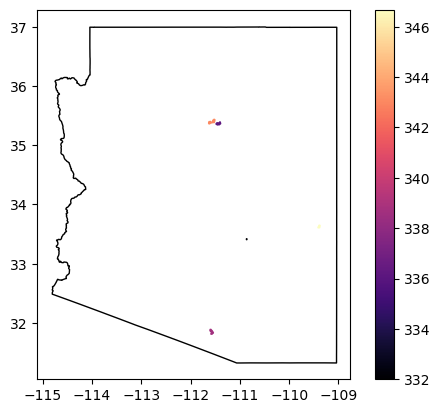

In [23]:
fig, ax = plt.subplots()
az.plot(ax = ax, color='white', edgecolor='black')
AZpolys.plot(ax = ax, column='brightness', cmap = 'magma', legend = True)



But that's kind of hard to see, so we'll go back go explore.

In [24]:
AZpolys.explore(column='brightness', cmap = 'plasma', tiles = "Stamen Terrain")

#other useful explore arguments
#tooltip allows you to change which information shows up when you hovor over a shape on the map
#vmin and vmax allows you to set min and max values for the colormap
#marker_type allows you to change the maker style for point data

## 5. More Useful Features

1. geocode and reverse_geocode - can covert between strings (like addresses) and geographic data points (Requires geopy, not in this environmnet)
2. collect - collects individual geometries into a multi geomentry (opposide of explode, different from dissolve in that it doesn't merge overlapping geometries)
3. centroid - find the centroid of each geometry.
4. And much more!